# Local Model Serving with MLflow

In [ ]:
import httpx 
import pandas as pd
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

```shell
mlflow models serve --options
```

To run the code below make sure you deploy the model using.

`poetry run mlflow models serve -m models:/walmart-store-sales-regressor@production --env-manager local`

In [2]:
from examples.walmart_sales_regression.data import SalesDataProcessor
from examples.utils.file_utils import get_root_dir

In [5]:

root_dir = get_root_dir()
data_path = (
    root_dir.parents[1] / "Downloads" / "sales-walmart" / "Walmart_Sales.csv"
)  # change this to your data path
url = "http://localhost:5000/invocations"
data_processor = SalesDataProcessor(path=data_path)
_, x_test, _, y_test = data_processor.create_train_test_split()

# predicting for the store store_id
store_id = 3
x_test = x_test[x_test["Store"] == store_id]
y_test = y_test[y_test["Store"] == store_id]

payload = {
    "dataframe_split": x_test.to_dict(orient="split"),
    "params": {"store_id": store_id},
}
headers = {"Content-Type": "application/json"}
response = httpx.post(url, json=payload, headers=headers)

In [6]:
response.json()

{'predictions': [381306.59830000007,
  399641.18199999986,
  404548.3252999999,
  370718.64340000035,
  385128.27960000036,
  355014.8239999998,
  381454.1301000001,
  355014.8239999998,
  404548.3252999999,
  397952.15919999994,
  426965.7286999998,
  404548.3252999999,
  355014.8239999998,
  392481.14290000044,
  385128.27960000036,
  426965.7286999998,
  426965.7286999998,
  385128.27960000036,
  399220.0051000001,
  375978.3324,
  385128.27960000036,
  407951.74690000043,
  404548.3252999999,
  355014.8239999998,
  397952.15919999994,
  370718.64340000035,
  370718.64340000035,
  381454.1301000001,
  407951.74690000043,
  381454.1301000001,
  410643.54180000006,
  407951.74690000043,
  407951.74690000043,
  399220.0051000001,
  375978.3324]}

<Axes: >

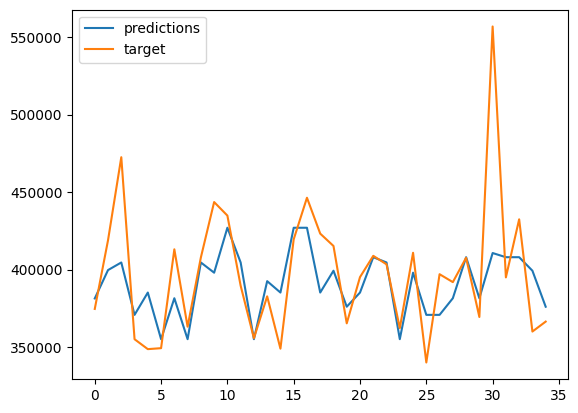

In [7]:
pd.DataFrame({
    "predictions": response.json()["predictions"],    
    "target": y_test["Weekly_Sales"].values,
}).plot()